# Validation Instability Analysis

## 1. Objective
The goal of this project is to investigate the stability between training and test data distributions, and to identify factors that influence the consistency of feature–target relationships across different data splitting strategies.

## 2. Data Description
The dataset used in this study is the Online News Popularity dataset, which contains information about online news articles and their associated popularity.

### 2.1 Dataset Overview

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('OnlineNewsPopularity.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [28]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [29]:
data.nunique()

url                              39644
 timedelta                         724
 n_tokens_title                     20
 n_tokens_content                 2406
 n_unique_tokens                 27281
                                 ...  
 title_subjectivity                673
 title_sentiment_polarity          813
 abs_title_subjectivity            532
 abs_title_sentiment_polarity      653
 shares                           1454
Length: 61, dtype: int64

In [30]:
y = data[' shares']
X = data.drop('url',axis=1)

### 2.2 Log Transformation and Heavy-Tail Characteristics
To assess whether the target variable exhibits heavy-tailed behavior, we compare the maximum value to the median as a simple diagnostic.
A large max-to-median ratio indicates the presence of extreme values and suggests that the distribution may be heavy-tailed.

In [31]:
print('Max to Med ratio: ' , y.max()/y.median()) ## Heavy Tail Ratio 

Max to Med ratio:  602.3571428571429


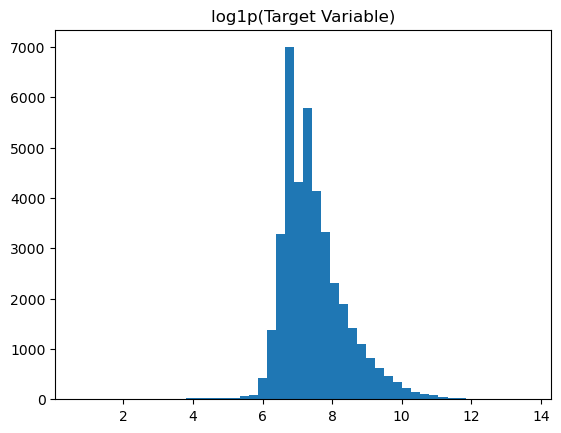

In [32]:
plt.hist(np.log1p(y), bins=50)
plt.title('log1p(Target Variable)')
plt.show()

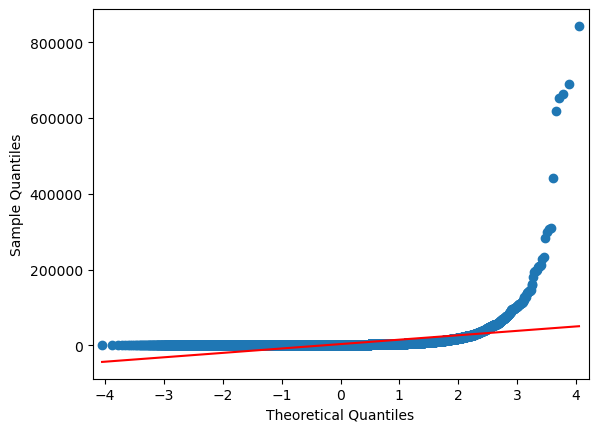

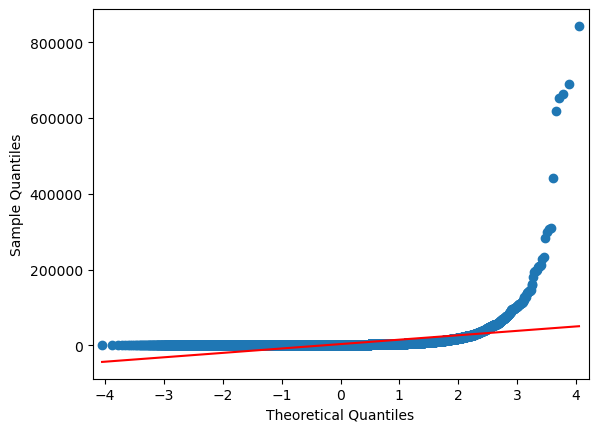

In [33]:
sm.qqplot(y,line='s')

Based on the dataset description, we observe that the target variable exhibits a strongly heavy-tailed distribution with extreme values.

Such distributional characteristics are known to increase statistical instability and may significantly influence subsequent analyses,
particularly those involving train–test data splitting.


### 2.3 Time-Related Variable

**`timedelta`**: Number of days between article publication and dataset acquisition.

The dataset contains a time-related variable, `timedelta`, which provides a natural temporal ordering of observations and enables time-aware data splitting strategies.

## 3. Methodology

### 3.1 Data Splitting Strategies

#### 3.1.1 K-Fold Cross Validation
K-Fold cross validation is used as the primary data splitting strategy. With shuffling enabled, the data are assumed to be independently and
identically distributed (IID).

#### 3.1.2 Time Series Split

Time series splitting preserves the temporal ordering of observations, where training samples strictly precede test samples in time.

In this study, the ordering is determined by the `timedelta` variable, which represents the time difference between article publication and
data acquisition.

Unlike random splitting, this setting violates the independent and identically distributed (IID) assumption and represents a weakly non-IID validation scenario.


### 3.2 Correlation Measures

Correlation measures are used to quantify the stability of feature–target relationships between training and test sets. If correlations vary
substantially across folds, this indicates that relationships learned from the training data may not generalize reliably to unseen data.

In this study, we consider both Pearson and Spearman correlations due to their complementary characteristics. Pearson correlation captures
linear dependence between variables, while Spearman correlation measures monotonic relationships based on rank ordering and is more robust to
outliers and heavy-tailed distributions.

By incorporating both measures, we aim to provide a more comprehensive assessment of correlation stability under different data splitting
strategies.

### 3.3 Correlation Gap Definition

The correlation gap between training and testing sets represents the consistency of variable relationships across data splits.
A large correlation gap implies that correlation patterns learned from the training set may not generalize well to the testing set.

Moreover, the variability of correlation gaps across folds provides insight into data stability. Significant differences among folds suggest that the dataset may exhibit weak-IID behavior, where the underlying distributions are not fully identical across samples.

### 3.4 Unified Correlation Stability Analysis Pipeline

In [34]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr

def compute_corr_gap(X, y, splitter):
    """
    Compute train/test Pearson & Spearman correlations per feature per fold,
    and their gaps, using a provided sklearn splitter (e.g., KFold, TimeSeriesSplit).

    'gap' is defined as train minus test correlation.

    Formula: gap = corr_train - corr_test
    """
    results = []

    for fold_id, (train_idx, test_idx) in enumerate(splitter.split(X)):
        X_train = X.iloc[train_idx]
        X_test  = X.iloc[test_idx]
        y_train = y.iloc[train_idx]
        y_test  = y.iloc[test_idx]

        for feature in X.columns:
            x_tr = X_train[feature]
            x_te = X_test[feature]

            # Pearson
            if x_tr.nunique() > 1 and x_te.nunique() > 1:
                p_tr = pearsonr(x_tr, y_train)[0]
                p_te = pearsonr(x_te, y_test)[0]
            else:
                p_tr, p_te = np.nan, np.nan

            # Spearman
            if x_tr.nunique() > 1 and x_te.nunique() > 1:
                s_tr = spearmanr(x_tr, y_train)[0]
                s_te = spearmanr(x_te, y_test)[0]
            else:
                s_tr, s_te = np.nan, np.nan

            results.append({
                "fold": fold_id,
                "feature": feature,
                "pearson_train": p_tr,
                "pearson_test": p_te,
                "pearson_gap": p_tr - p_te,
                "pearson_abs_gap": np.abs(p_tr - p_te),
                "spearman_train": s_tr,
                "spearman_test": s_te,
                "spearman_gap": s_tr - s_te,
                "spearman_abs_gap": np.abs(s_tr - s_te),
            })

    return pd.DataFrame(results)


## 4. Results

### 4.1 K-Fold Results 
This section summarizes the correlation stability metrics under random K-Fold splitting.


In [35]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
results_kf = compute_corr_gap(X, y, splitter=kf)
results_kf

,fold,feature,pearson_train,pearson_test,pearson_gap,pearson_abs_gap,spearman_train,spearman_test,spearman_gap,spearman_abs_gap
0,0,timedelta,0.009762,0.004060,5.702326e-03,5.702326e-03,0.034886,0.020905,1.398076e-02,1.398076e-02
1,0,n_tokens_title,0.012481,-0.007412,1.989339e-02,1.989339e-02,-0.038988,-0.045574,6.586682e-03,6.586682e-03
2,0,n_tokens_content,0.005341,-0.010502,1.584236e-02,1.584236e-02,0.010847,0.004279,6.567725e-03,6.567725e-03
3,0,n_unique_tokens,0.000912,-0.003579,4.491281e-03,4.491281e-03,-0.044432,-0.046171,1.739093e-03,1.739093e-03
4,0,n_non_stop_words,0.000640,-0.023721,2.436010e-02,2.436010e-02,0.010323,0.006311,4.011157e-03,4.011157e-03
...,...,...,...,...,...,...,...,...,...,...
295,4,title_subjectivity,0.023276,0.016260,7.016780e-03,7.016780e-03,0.039445,0.046239,-6.793861e-03,6.793861e-03
296,4,title_sentiment_polarity,0.011454,0.018994,-7.540716e-03,7.540716e-03,0.059044,0.048064,1.098035e-02,1.098035e-02
297,4,abs_title_subjectivity,-0.003272,0.023220,-2.649150e-02,2.649150e-02,-0.000589,-0.001625,1.035747e-03,1.035747e-03
298,4,abs_title_sentiment_polarity,0.027850,0.024120,3.730248e-03,3.730248e-03,0.035670,0.043145,-7.474601e-03,7.474601e-03


#### 4.1.1 Feature-wise Mean Stability Statistics
This feature-level summary reports the average correlation stability across all folds, allowing us to examine how consistently each feature preserves its relationship with the target variable.

In [36]:
feature_summary = (
    results_kf
    .groupby("feature")
    .agg(
        mean_abs_gap_pearson=("pearson_gap", lambda x: x.abs().mean()),
        std_gap_pearson=("pearson_gap", "std"),
        mean_abs_gap_spearman=("spearman_gap", lambda x: x.abs().mean()),
        std_gap_spearman=("spearman_gap", "std"),
    )
    .reset_index()
)

feature_summary

,feature,mean_abs_gap_pearson,std_gap_pearson,mean_abs_gap_spearman,std_gap_spearman
0,LDA_00,8.857022e-03,1.115757e-02,7.821001e-03,9.217314e-03
1,LDA_01,4.423898e-03,6.395824e-03,1.470864e-02,1.782711e-02
2,LDA_02,8.582781e-03,1.252434e-02,1.049905e-02,1.203337e-02
3,LDA_03,1.039472e-02,1.273893e-02,1.220484e-02,1.590653e-02
4,LDA_04,1.394884e-02,1.658456e-02,1.382079e-02,2.044473e-02
5,abs_title_sentiment_polarity,7.042169e-03,9.510225e-03,9.849790e-03,1.249028e-02
6,abs_title_subjectivity,1.270601e-02,1.674928e-02,4.565860e-03,6.498356e-03
7,average_token_length,1.131044e-02,1.587385e-02,1.054132e-02,1.261426e-02
8,avg_negative_polarity,1.821266e-02,2.287678e-02,5.960167e-03,7.818204e-03
9,avg_positive_polarity,1.428657e-02,1.774069e-02,5.740428e-03,6.858709e-03


#### 4.1.2 Box-Plot Fold-wise Pearson Correlation gap 

This visualization shows how Pearson correlation gaps vary across different folds, providing insight into fold-wise stability.

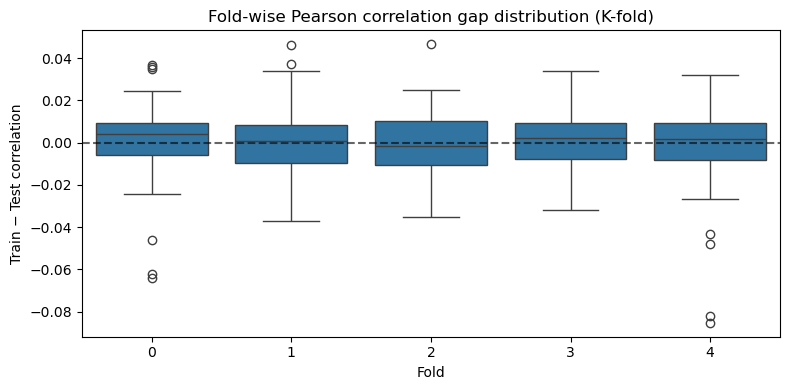

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

sns.boxplot(
    data=results_kf,
    x="fold",
    y="pearson_gap"
)

plt.axhline(0, color="black", linestyle="--", alpha=0.6)
plt.title("Fold-wise Pearson correlation gap distribution (K-fold)")
plt.xlabel("Fold")
plt.ylabel("Train − Test correlation")

plt.tight_layout()
plt.show()

#### 4.1.3 Box-Plot Fold-wise Spearman Correlation gap 

This visualization shows how Spearman correlation gaps vary across different folds, providing insight into fold-wise stability.

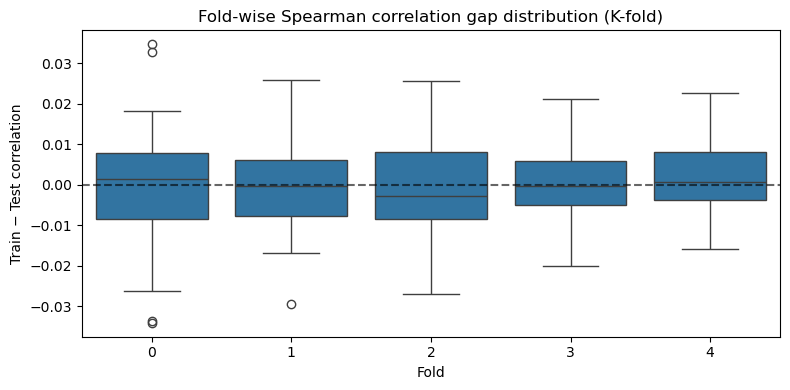

In [38]:
plt.figure(figsize=(8, 4))

sns.boxplot(
    data=results_kf,
    x="fold",
    y="spearman_gap"
)

plt.axhline(0, color="black", linestyle="--", alpha=0.6)
plt.title("Fold-wise Spearman correlation gap distribution (K-fold)")
plt.xlabel("Fold")
plt.ylabel("Train − Test correlation")

plt.tight_layout()
plt.show()

#### 4.1.4 Box-Plot Fold-wise Summary Statistics of Correlation Gaps
This Table reports the mean and standard deviation of absolute correlation gaps for each fold, summarizing the distribution shown in the box plots.

In [39]:
pearson_col = np.abs(results_kf["pearson_train"]-results_kf["pearson_test"])
spearman_col = np.abs(results_kf["spearman_train"]-results_kf["spearman_test"])

fold = results_kf['fold']

pcor = pd.DataFrame({
            'fold' : fold,
            'abs_pearson_gap' : pearson_col,
            'abs_spearman_gap' : spearman_col
            
        })
results_std = []

for index in range(0,5) : 
    pstd = np.std(pcor[fold==index]['abs_pearson_gap'])
    sstd = np.std(pcor[fold==index]['abs_spearman_gap'])
    pmean = np.mean(pcor[fold==index]['abs_pearson_gap'])
    smean = np.mean(pcor[fold==index]['abs_spearman_gap'])
    
    results_std.append({
        'fold' : index,
        'pearson_std' : pstd,
        'spearman_std' : sstd,
        'pearson_mean' : pmean,
        'spearman_mean' : smean
        
    })
results_std = pd.DataFrame(results_std)
print(results_std)

   fold  pearson_std  spearman_std  pearson_mean  spearman_mean
0     0     0.013323      0.008540      0.012853       0.010117
1     1     0.010128      0.006627      0.012070       0.008389
2     2     0.010199      0.006522      0.013005       0.009907
3     3     0.008284      0.005769      0.010057       0.007436
4     4     0.016459      0.005053      0.014526       0.006504


#### 4.1.5 Comparison of Pearson and Spearman Correlation Gap Distributions
This visualization compares the distributions of Pearson and Spearmancorrelation gaps across folds.

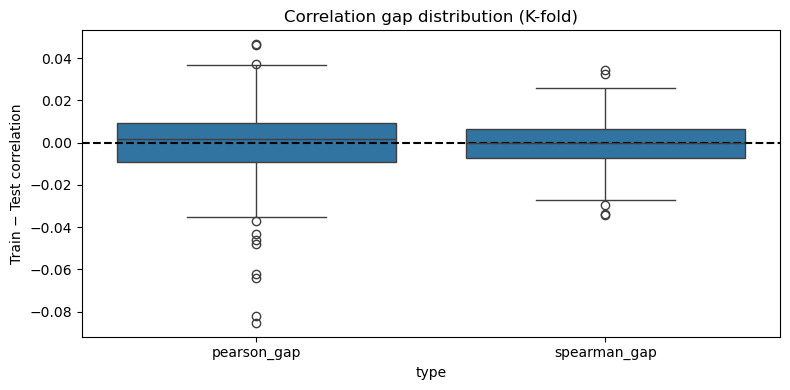

In [40]:
plot_df = results_kf.melt(
    id_vars=["fold", "feature"],
    value_vars=["pearson_gap", "spearman_gap"],
    var_name="type",
    value_name="gap"
)

plt.figure(figsize=(8, 4))

sns.boxplot(
    data=plot_df,
    x="type",
    y="gap"
)

plt.axhline(0, linestyle="--", color="black")
plt.title("Correlation gap distribution (K-fold)")
plt.ylabel("Train − Test correlation")

plt.tight_layout()
plt.show()


### 4.2 Time series Results
The same correlation stability analysis is applied using time-series splitting.

In [41]:
from sklearn.model_selection import TimeSeriesSplit

df_sorted = data.sort_values(" timedelta", ascending=True)

X_sorted = df_sorted.drop([' shares','url'],axis=1)
y_sorted = df_sorted[" shares"]

tscv = TimeSeriesSplit(n_splits=5)
results_ts = compute_corr_gap(X_sorted, y_sorted, splitter=tscv)
results_ts

,fold,feature,pearson_train,pearson_test,pearson_gap,pearson_abs_gap,spearman_train,spearman_test,spearman_gap,spearman_abs_gap
0,0,timedelta,0.003381,-0.017632,0.021013,0.021013,0.011186,0.034033,-0.022847,0.022847
1,0,n_tokens_title,0.030349,0.020357,0.009992,0.009992,-0.021332,-0.011759,-0.009573,0.009573
2,0,n_tokens_content,-0.062728,-0.028719,-0.034010,0.034010,-0.074904,0.004289,-0.079192,0.079192
3,0,n_unique_tokens,-0.067026,0.005032,-0.072057,0.072057,-0.027297,-0.062127,0.034831,0.034831
4,0,n_non_stop_words,-0.098034,0.004573,-0.102606,0.102606,-0.073855,0.008303,-0.082158,0.082158
...,...,...,...,...,...,...,...,...,...,...
290,4,max_negative_polarity,-0.020170,-0.015910,-0.004260,0.004260,0.003256,-0.011158,0.014414,0.014414
291,4,title_subjectivity,0.027010,0.001405,0.025605,0.025605,0.045770,0.018112,0.027658,0.027658
292,4,title_sentiment_polarity,0.012861,0.012462,0.000399,0.000399,0.057756,0.043236,0.014520,0.014520
293,4,abs_title_subjectivity,-0.002322,0.017457,-0.019779,0.019779,-0.006544,0.024294,-0.030838,0.030838


#### 4.2.1 Feature-wise Mean Stability Statistics

In [42]:
feature_summary_ts = (
    results_ts
    .groupby("feature")
    .agg(
        mean_abs_gap_pearson=("pearson_gap", lambda x: x.abs().mean()),
        std_gap_pearson=("pearson_gap", "std"),
        mean_abs_gap_spearman=("spearman_gap", lambda x: x.abs().mean()),
        std_gap_spearman=("spearman_gap", "std"),
    )
    .reset_index()
)

feature_summary_ts.head()

,feature,mean_abs_gap_pearson,std_gap_pearson,mean_abs_gap_spearman,std_gap_spearman
0,LDA_00,0.013555,0.015823,0.022713,0.025269
1,LDA_01,0.014265,0.023006,0.054889,0.064314
2,LDA_02,0.024738,0.018390,0.066312,0.039663
3,LDA_03,0.029422,0.030252,0.028632,0.031862
4,LDA_04,0.009622,0.016284,0.025668,0.024218


#### 4.2.2 Box-Plot Fold-wise Pearson Correlation gap 

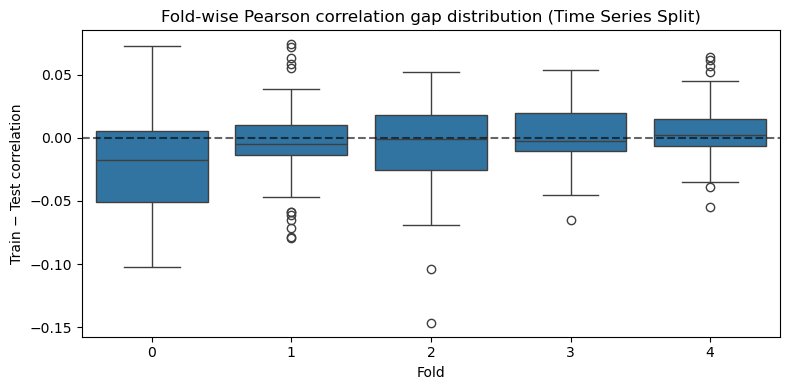

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))

sns.boxplot(
    data=results_ts,
    x="fold",
    y="pearson_gap"
)

plt.axhline(0, color="black", linestyle="--", alpha=0.6)
plt.title("Fold-wise Pearson correlation gap distribution (Time Series Split)")
plt.xlabel("Fold")
plt.ylabel("Train − Test correlation")

plt.tight_layout()
plt.show()

#### 4.2.3 Box-Plot Fold-wise Spearman Correlation gap 

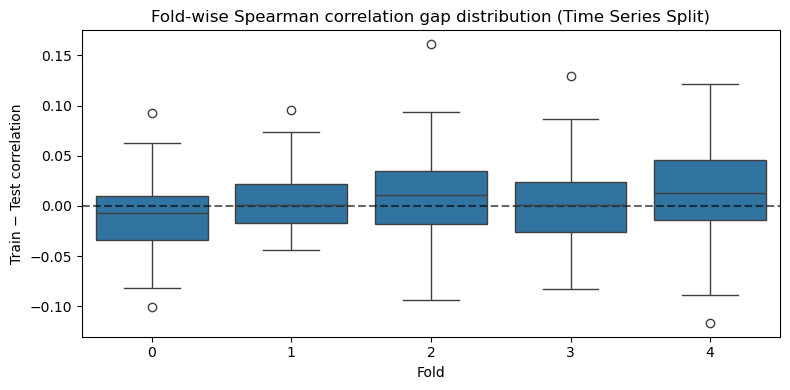

In [44]:
plt.figure(figsize=(8, 4))

sns.boxplot(
    data=results_ts,
    x="fold",
    y="spearman_gap"
)

plt.axhline(0, color="black", linestyle="--", alpha=0.6)
plt.title("Fold-wise Spearman correlation gap distribution (Time Series Split)")
plt.xlabel("Fold")
plt.ylabel("Train − Test correlation")

plt.tight_layout()
plt.show()

#### 4.2.4 Box-Plot Fold-wise Summary Statistics of Correlation Gaps

In [45]:
pearson_col = np.abs(results_ts["pearson_train"]-results_ts["pearson_test"])
spearman_col = np.abs(results_ts["spearman_train"]-results_ts["spearman_test"])

fold = results_ts['fold']

pcor = pd.DataFrame({
            'fold' : fold,
            'abs_pearson_gap' : pearson_col,
            'abs_spearman_gap' : spearman_col
            
        })
results_std = []

for index in range(0,5) : 
    pstd = np.std(pcor[fold==index]['abs_pearson_gap'])
    sstd = np.std(pcor[fold==index]['abs_spearman_gap'])
    pmean = np.mean(pcor[fold==index]['abs_pearson_gap'])
    smean = np.mean(pcor[fold==index]['abs_spearman_gap'])
    
    results_std.append({
        'fold' : index,
        'pearson_std' : pstd,
        'spearman_std' : sstd,
        'pearson_mean' : pmean,
        'spearman_mean' : smean
        
    })
results_std = pd.DataFrame(results_std)
print(results_std)

   fold  pearson_std  spearman_std  pearson_mean  spearman_mean
0     0     0.025647      0.024310      0.032774       0.029290
1     1     0.024213      0.019190      0.023512       0.024390
2     2     0.024356      0.029760      0.025011       0.035588
3     3     0.013876      0.024780      0.017970       0.030065
4     4     0.016221      0.032823      0.016804       0.040765


#### 4.2.5 Comparison of Pearson and Spearman Correlation Gap Distributions

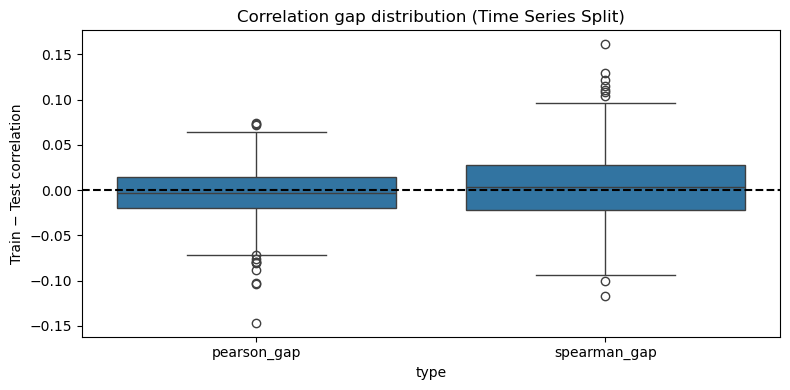

In [46]:
plot_df = results_ts.melt(
    id_vars=["fold", "feature"],
    value_vars=["pearson_gap", "spearman_gap"],
    var_name="type",
    value_name="gap"
)

plt.figure(figsize=(8, 4))

sns.boxplot(
    data=plot_df,
    x="type",
    y="gap"
)

plt.axhline(0, linestyle="--", color="black")
plt.title("Correlation gap distribution (Time Series Split)")
plt.ylabel("Train − Test correlation")

plt.tight_layout()
plt.show()


## 5. Discussion

### 5.1 Why temporal dependency is not easily detected
A key challenge in real-world datasets is that temporal structure is often implicit rather than explicit.

In the Online News Popularity dataset, temporal ordering is encoded through the `timedelta` variable, which may appear to be an ordinary numerical feature during exploratory analysis. When examined using standard EDA techniques, its marginal distribution shows no clear time-series patterns such as trend or seasonality. As a result, the dataset can easily be treated as approximately IID.

However, temporal dependency is primarily an ordering-based property rather than a distributional one. Common EDA tools—including histograms, summary statistics, and pairwise correlations—do not preserve ordering information. Once observations are randomly shuffled, temporal structure becomes difficult to detect.

When the data are instead sorted by the `timedelta` variable, temporal dependency becomes apparent, revealing gradual distributional shifts over time. This illustrates a key limitation of conventional EDA: datasets may contain latent temporal processes that remain hidden unless ordering is explicitly examined.

### 5.2 Limitations of exploratory data analysis and false assumptions
Standard exploratory data analysis primarily examines marginal distributions and pairwise relationships. While useful for understanding individual variables, these views can obscure temporal structure that depends on the ordering of observations.

When summary statistics and correlations appear stable across randomly sampled subsets, datasets may seem statistically homogeneous. This apparent consistency often reinforces the assumption that the data are independently and identically distributed (IID), even when temporal dependency is present.

As a result, random cross-validation is frequently adopted without recognizing underlying distribution shifts across time. Such false assumptions can lead to overly optimistic validation results that fail to reflect real-world deployment conditions.

### 5.3 When poor performance is not a modeling problem

When model performance decreases under temporal splitting, the problem is often interpreted as a limitation of the model itself. This typically leads practitioners to replace simple linear models with more complex approaches such as tree-based or ensemble methods.

However, the results of this study indicate that reduced performance does not necessarily arise from model misspecification. Instead, it may reflect instability in the data distribution over time. When temporal distribution shifts are present, the relationship between features and the target variable can change across different periods, making consistent generalization difficult.

Under these conditions, increasing model complexity cannot resolve the mismatch between training and testing data. More flexible models may even worsen instability by fitting short-lived patterns that appear only in specific time segments. As a result, such models can show apparent improvements under random cross-validation while failing when evaluated using temporally ordered splits.

### 5.4 Implications for validation design
These results suggest that model performance should not be interpreted in isolation from the data used for validation. Before selecting algorithms or tuning hyperparameters, it is essential to examine how the data are generated and ordered.

If observations contain temporal structure—whether explicit or implicit—random cross-validation may mix fundamentally different time periods. In such cases, evaluation results can appear stable even when the learned relationships do not generalize over time.

This study highlights that validation strategy is not a technical detail, but a central design choice. Understanding how the data evolve is often more important than increasing model complexity.

### 5.5 Choice of correlation-based analysis
In this study, correlation-based measures were used to evaluate validation stability. While more sophisticated dependency metrics may exist, correlation tests were selected for their transparency and interpretability.

Correlation coefficients provide an intuitive summary of feature–target relationships, allowing readers to directly compare patterns between training and testing sets. This interpretability is particularly valuable when the objective is not predictive performance, but understanding how statistical relationships change across data splits.

By using widely understood measures such as Pearson and Spearman correlations, the analysis emphasizes clarity over methodological complexity, ensuring that observed instability can be easily interpreted and reproduced. Future work may explore alternative dependence measures; however, the correlation-based approach offers a simple and effective baseline for diagnosing validation instability.

Moreover, We intentionally avoid direct numerical comparison of correlation standard deviations, as their absolute magnitudes lack a meaningful scale. Instead, we focus on fold-level variability patterns, which more accurately reflect validation instability.

## 6. Conclusion

This study investigated validation instability under different data splitting strategies, with a particular focus on comparing random K-Fold splitting and time-series splitting.

The results show that correlation structures between features and the target variable remain relatively stable under random K-Fold splitting, where the independent and identically distributed (IID) assumption approximately holds. In contrast, substantially larger variability is observed under time-series splitting, indicating reduced stability of feature–target relationships.

This difference arises from the underlying assumptions of each validation strategy. While random splitting mixes observations drawn from similar distributions, time-series splitting preserves temporal ordering and exposes distributional shifts across time. In datasets characterized by noise and heavy-tailed behavior, such shifts can lead to unstable correlations between training and testing sets.

Overall, these findings highlight that validation performance and stability are strongly influenced by the chosen data splitting strategy. Random cross-validation may therefore produce overly optimistic assessments when temporal dependency or distribution shift is present, underscoring the importance of aligning validation design with the data-generating process.